In [ ]:
import pmdarima as pm
import matplotlib.pyplot as plt

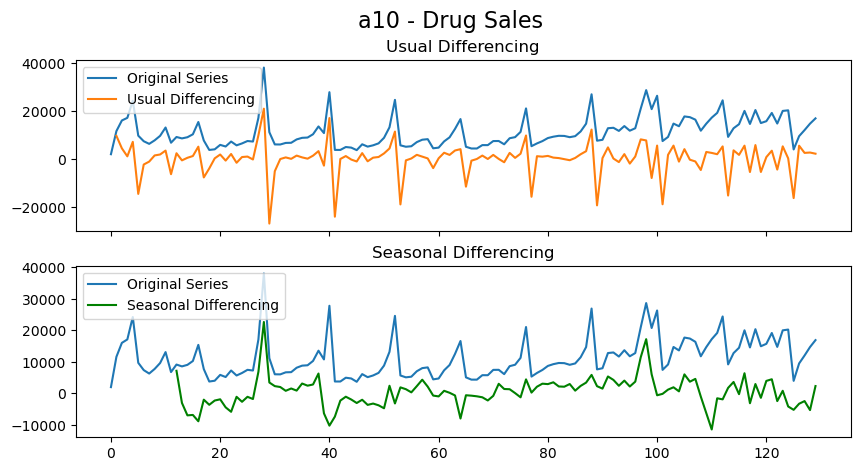

In [18]:
 import pandas as pd
 # Import
data = pd.read_csv(r"C:\Work\Neoquant\whole grouping data.csv")
data['DATE'] = pd.to_datetime(data['DATE'])
data.index.freq = 'MS'
data.head(10)
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot( data.PCOUNT ,label='Original Series')
axes[0].plot(data.PCOUNT.diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot( data.PCOUNT, label='Original Series')
axes[1].plot( data.PCOUNT.diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()


In [19]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data.PCOUNT, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=2263.313, Time=0.72 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2331.077, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2272.825, Time=0.16 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2281.652, Time=0.22 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2330.094, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=2296.942, Time=0.07 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=2263.546, Time=1.38 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=2270.126, Time=1.21 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=2271.851, Time=0.32 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=3.75 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=2263.484, Time=0.54 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=2264.136, Time=1.28 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=2270.334, Time=0.43 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=2296.883, Time=0.68 sec
 ARIMA(0,0,2)(0,1,1)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1126.656
Date:                            Wed, 16 Sep 2020   AIC                           2263.313
Time:                                    19:04:22   BIC                           2277.166
Sample:                                         0   HQIC                          2268.938
                                            - 130                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    417.2646    211.178      1.976      0.048       3.364     831.165
ar.L1          0.5897      0.156      3.772      0.000       0.283       0.896
ma.L1         -0.1134      0.173     -0.655      0.512      -0.452       0.226
ma.S.L12      -0.7050      0.089     -7.937      0.000      -0.879      -0.531
sigma2      1.128e+07    8.7e+05     12.969      0.000    9.58e+06     1.3e+07
===================================================================================
Ljung-Box (Q):                       29.81   Jarque-Bera (JB):               436.25
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             1.68
Prob(H) (two-sided):                  0.44   Kurtosis:                        11.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
from pandas.tseries.offsets import DateOffset

In [21]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)

#index_of_fc = pd.date_range(data.DATE.index[1], periods = n_periods, freq='MS')
index_of_fc = pd.date_range('2020-09-01', periods = n_periods, freq='MS')

#index_of_fc=[data.index[-1]+ DateOffset(months=x)for x in range(0,2)]

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
#plt.plot(data.PCOUNT)
#plt.plot(fitted_series, color='darkgreen')
#plt.fill_between(lower_series.index, 
                ## upper_series, 
                # color='k', alpha=.15)

#plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
#plt.show()


In [22]:
fitted_series

2020-09-01    18397.226007
2020-10-01    15678.130328
2020-11-01    14912.643941
2020-12-01    18210.204766
2021-01-01    19067.573766
2021-02-01    20830.362404
2021-03-01    26454.783176
2021-04-01     9757.716524
2021-05-01    12262.491973
2021-06-01    14778.600730
2021-07-01    16861.680334
2021-08-01    16902.238515
2021-09-01    18997.710615
2021-10-01    16449.530237
2021-11-01    15784.841011
2021-12-01    19141.846881
2022-01-01    20034.273549
2022-02-01    21817.737418
2022-03-01    27454.351391
2022-04-01    10764.475669
2022-05-01    13273.491964
2022-06-01    15792.101755
2022-07-01    17876.656343
2022-08-01    17918.084394
Freq: MS, dtype: float64

<AxesSubplot:>

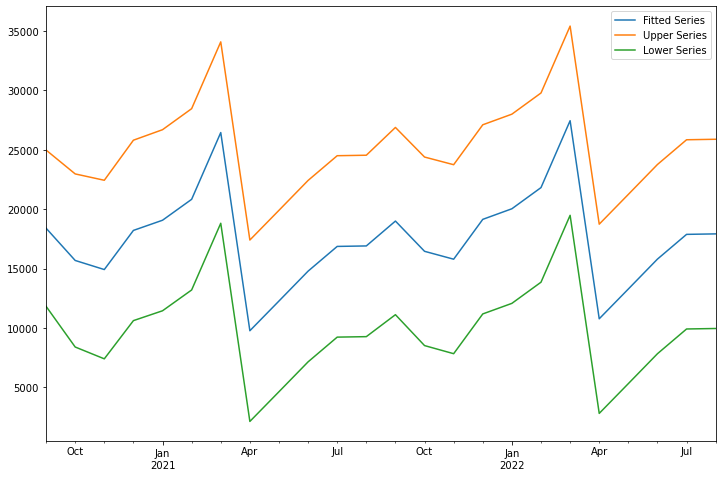

In [23]:
#data.plot(legend=True,label='data')
fitted_series.plot(legend=True,label='Fitted Series',figsize=(12,8))
upper_series.plot(legend=True,label='Upper Series',figsize=(12,8))
lower_series.plot(legend=True,label='Lower Series',figsize=(12,8))

In [24]:
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.graph_objs as go
import chart_studio.plotly as py
#plot monthly sales
plot_data = [
    go.Scatter(
        y = data.PCOUNT,x=data.DATE
    )
]
plot_layout = go.Layout(
        title='Test Prediction'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(upper_series, lower_series)

ValueError: continuous is not supported